# ML - Spring 2024 - Practical - 4

## Practical Homework 4 - Bagging, Random Forest, Decision tree

Student Name: Ariana Dariuni

Student Number: 400103624

# Phase 0: Intro

**In this assignment, you will develop Decision tree and Random Forest algorithms to perform data segmentation. The data is related with marketing campaign of a banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).**

In [1]:
%%capture

!pip install optuna
!pip install catboost
!pip install gdown

Importing necessary libraries

In [2]:
import os

import matplotlib.pyplot as plt
import numpy as np
import optuna
import pandas as pd
import seaborn as sns
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import *
from sklearn.tree import DecisionTreeClassifier, plot_tree
from xgboost import XGBClassifier

In [3]:
import warnings
warnings.filterwarnings('ignore')

Download dataset

In [4]:
!wget -O dataset.csv 'https://www.dropbox.com/scl/fi/qvrwd6ult3rvbkadmailm/ML-P4-Dataset.csv?rlkey=gi0hguoqovs8ndkx370jfc4ow&dl=1'

--2024-05-24 17:48:37--  https://www.dropbox.com/scl/fi/qvrwd6ult3rvbkadmailm/ML-P4-Dataset.csv?rlkey=gi0hguoqovs8ndkx370jfc4ow&dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8c5c7771748f979907f1dbe5c3.dl.dropboxusercontent.com/cd/0/inline/CTjjUzJTsLeUXUxXkUNl4IvU4GlrrWmail3QVSloA7wSDhZKHF6_vZTyqmaHjyVG2HmwoecBtxPAWmhX6sftPo4dmXXOdOhZc9C2DCN8WqoZe3vDXnTJPbBztrKd_byaIfxm4ILiyUOl1Ups2YQ6FlkI/file?dl=1# [following]
--2024-05-24 17:48:38--  https://uc8c5c7771748f979907f1dbe5c3.dl.dropboxusercontent.com/cd/0/inline/CTjjUzJTsLeUXUxXkUNl4IvU4GlrrWmail3QVSloA7wSDhZKHF6_vZTyqmaHjyVG2HmwoecBtxPAWmhX6sftPo4dmXXOdOhZc9C2DCN8WqoZe3vDXnTJPbBztrKd_byaIfxm4ILiyUOl1Ups2YQ6FlkI/file?dl=1
Resolving uc8c5c7771748f979907f1dbe5c3.dl.dropboxusercontent.com (uc8c5c7771748f979907f1dbe5c3.dl.dropboxusercontent.com)... 

# Phase 1: Explore

## Sec 1: Load and Explore the given dataset **(P1-Sec1: 10 Points)**

Load the dataset and display the first 10 rows of dataset. **(P1-1-1: 2 points)**

In [5]:
file_path = "/kaggle/working/dataset.csv"
df = pd.read_csv(file_path)

df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,43,blue-collar,married,basic.4y,no,yes,no,cellular,may,mon,...,3,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,no
1,23,student,single,high.school,no,no,no,cellular,jun,tue,...,1,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,yes
2,39,services,divorced,high.school,no,no,no,cellular,jul,wed,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
3,32,admin.,married,university.degree,no,yes,yes,cellular,aug,fri,...,1,999,0,nonexistent,-2.9,92.201,-31.4,0.881,5076.2,no
4,33,management,single,university.degree,no,no,no,telephone,may,fri,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
5,24,admin.,single,high.school,no,no,no,cellular,jun,thu,...,2,999,1,failure,-2.9,92.963,-40.8,1.260,5076.2,yes
6,36,blue-collar,married,basic.4y,no,no,no,cellular,may,thu,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,no
7,51,entrepreneur,single,basic.9y,no,no,no,cellular,may,wed,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no
8,32,housemaid,single,high.school,no,no,no,telephone,jun,thu,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,no
9,42,admin.,divorced,high.school,no,yes,no,telephone,may,wed,...,5,999,1,failure,-1.8,92.893,-46.2,1.281,5099.1,no


Print the column names and number of data samples. **(P1-1-2: 2 points)**

In [6]:
print('Column names : ', list(df.columns))
print('Shape :' , df.shape)

Column names :  ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']
Shape : (32950, 21)


Identify the columns that contain nan values. **(P1-1-3: 2 points)**

In [7]:
columns_with_nan = df.columns[df.isna().any()].tolist()
if columns_with_nan :
    print(columns_with_nan)
else:
    print('There is no Nan in the dataframe')

df.info()

There is no Nan in the dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32950 non-null  int64  
 1   job             32950 non-null  object 
 2   marital         32950 non-null  object 
 3   education       32950 non-null  object 
 4   default         32950 non-null  object 
 5   housing         32950 non-null  object 
 6   loan            32950 non-null  object 
 7   contact         32950 non-null  object 
 8   month           32950 non-null  object 
 9   day_of_week     32950 non-null  object 
 10  duration        32950 non-null  int64  
 11  campaign        32950 non-null  int64  
 12  pdays           32950 non-null  int64  
 13  previous        32950 non-null  int64  
 14  poutcome        32950 non-null  object 
 15  emp.var.rate    32950 non-null  float64
 16  cons.price.idx  32950 non-null  float64
 17

Print the name of columns with categorical data and unique values of each of them. **(P1-1-4: 5 points)**

In [8]:
column_list = df.select_dtypes(include=['object'])
for column_name in column_list:
    print(f'Name of Column is: {column_name} and unique values are: {df[column_name].unique()}')


Name of Column is: job and unique values are: ['blue-collar' 'student' 'services' 'admin.' 'management' 'entrepreneur'
 'housemaid' 'technician' 'unemployed' 'self-employed' 'unknown' 'retired']
Name of Column is: marital and unique values are: ['married' 'single' 'divorced' 'unknown']
Name of Column is: education and unique values are: ['basic.4y' 'high.school' 'university.degree' 'basic.9y'
 'professional.course' 'basic.6y' 'unknown' 'illiterate']
Name of Column is: default and unique values are: ['no' 'unknown' 'yes']
Name of Column is: housing and unique values are: ['yes' 'no' 'unknown']
Name of Column is: loan and unique values are: ['no' 'yes' 'unknown']
Name of Column is: contact and unique values are: ['cellular' 'telephone']
Name of Column is: month and unique values are: ['may' 'jun' 'jul' 'aug' 'nov' 'mar' 'apr' 'oct' 'sep' 'dec']
Name of Column is: day_of_week and unique values are: ['mon' 'tue' 'wed' 'fri' 'thu']
Name of Column is: poutcome and unique values are: ['nonexi

Plot the density distribution for numerical columns. **(P1-1-5: 5 points)**

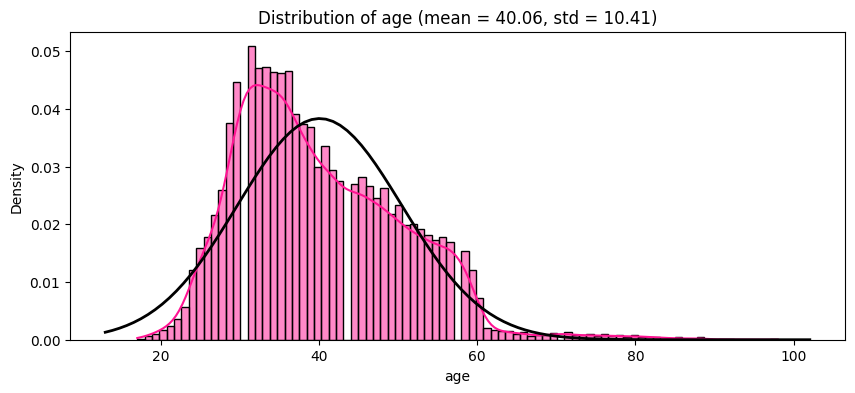

Shapiro-Wilk test for age: Statistics=0.957, p-value=0.000
age does not look like it follows a normal distribution (reject H0)


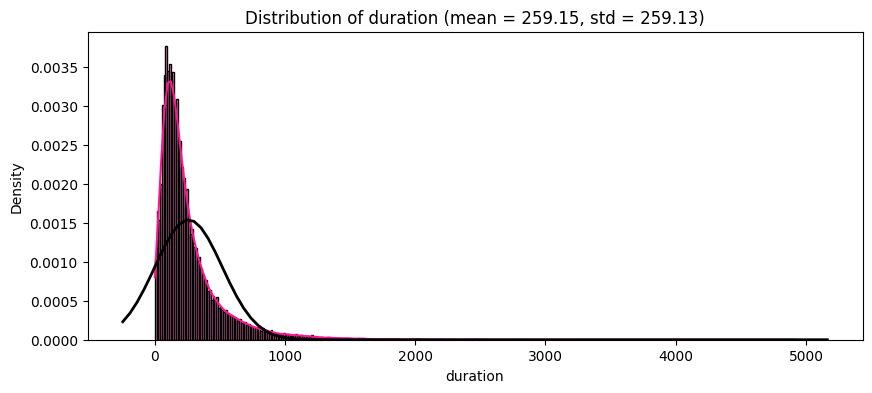

Shapiro-Wilk test for duration: Statistics=0.725, p-value=0.000
duration does not look like it follows a normal distribution (reject H0)


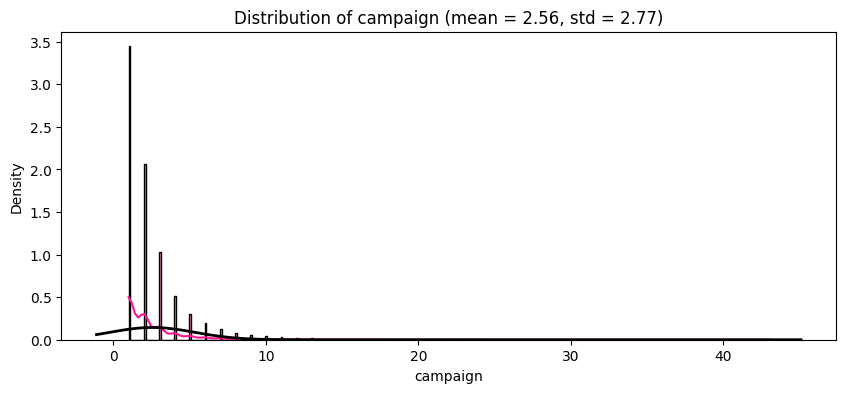

Shapiro-Wilk test for campaign: Statistics=0.558, p-value=0.000
campaign does not look like it follows a normal distribution (reject H0)


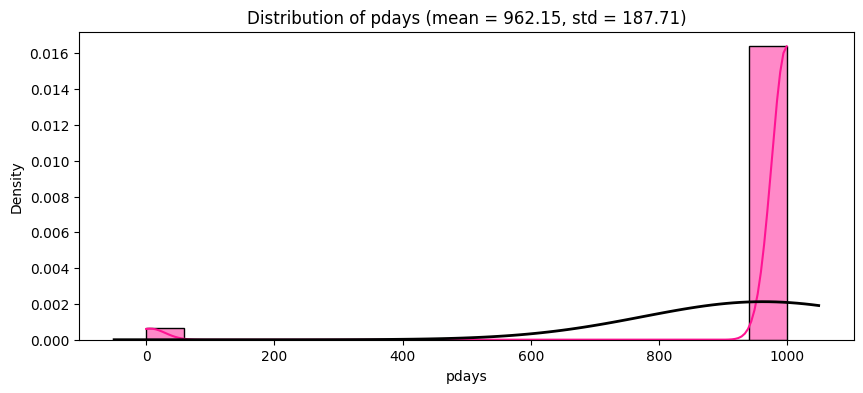

Shapiro-Wilk test for pdays: Statistics=0.184, p-value=0.000
pdays does not look like it follows a normal distribution (reject H0)


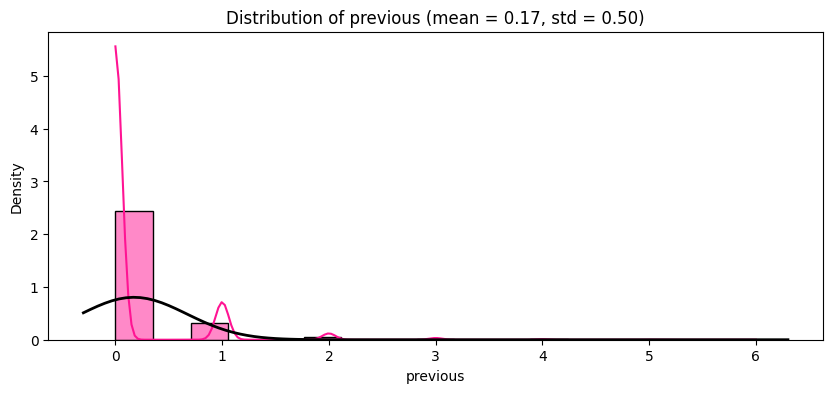

Shapiro-Wilk test for previous: Statistics=0.391, p-value=0.000
previous does not look like it follows a normal distribution (reject H0)


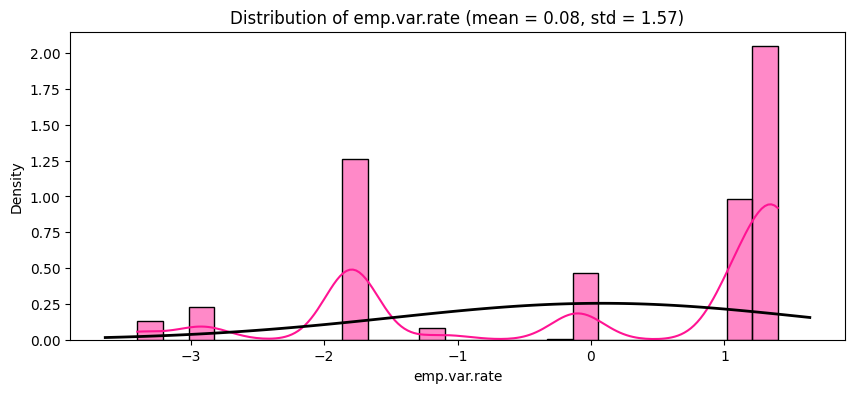

Shapiro-Wilk test for emp.var.rate: Statistics=0.763, p-value=0.000
emp.var.rate does not look like it follows a normal distribution (reject H0)


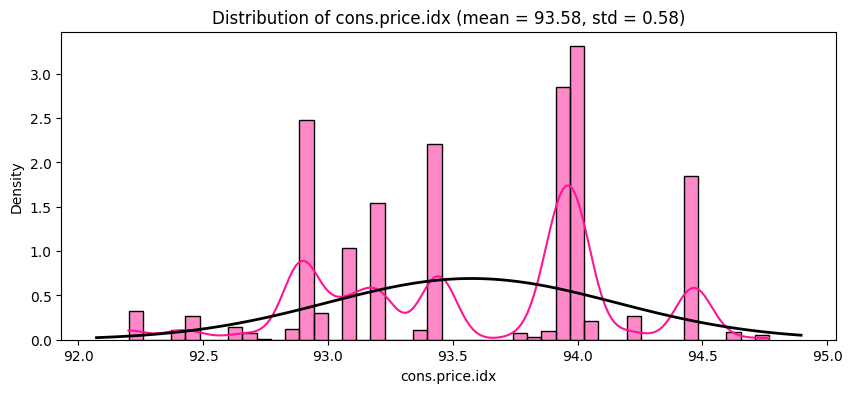

Shapiro-Wilk test for cons.price.idx: Statistics=0.934, p-value=0.000
cons.price.idx does not look like it follows a normal distribution (reject H0)


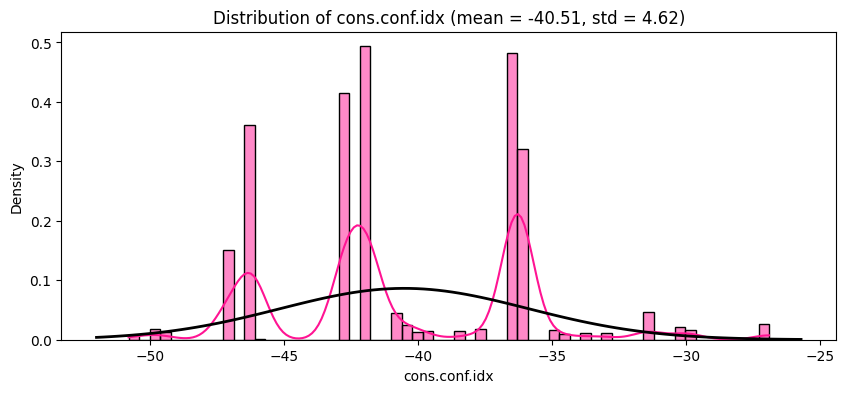

Shapiro-Wilk test for cons.conf.idx: Statistics=0.924, p-value=0.000
cons.conf.idx does not look like it follows a normal distribution (reject H0)


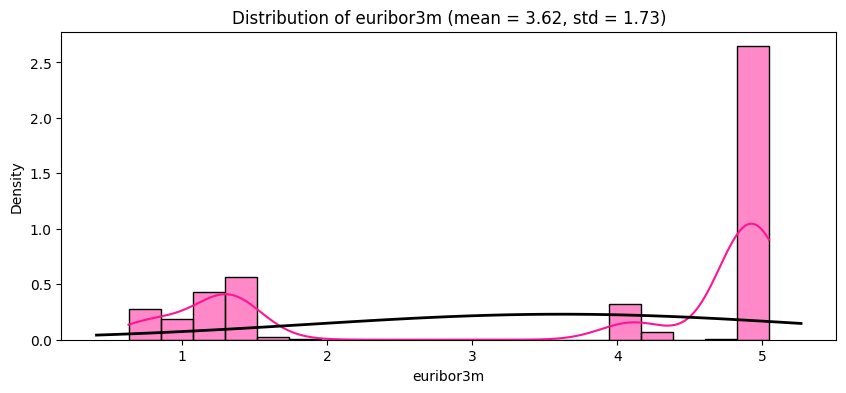

Shapiro-Wilk test for euribor3m: Statistics=0.687, p-value=0.000
euribor3m does not look like it follows a normal distribution (reject H0)


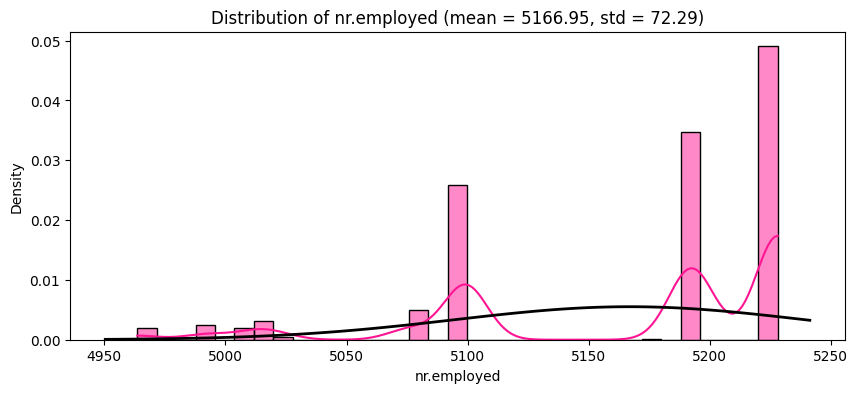

Shapiro-Wilk test for nr.employed: Statistics=0.788, p-value=0.000
nr.employed does not look like it follows a normal distribution (reject H0)


In [9]:
from scipy.stats import norm, shapiro

# return numerical columns of a dataframe
def return_numerical(df):
    return df.select_dtypes(include=np.number).columns.tolist()


# return categorical columns of dataframe
def return_categorical(df):
    return df.select_dtypes(include=['object']).columns.tolist()


# plot the distribution of numerical columns to check if they follow normal distribution

def check_normal(df):
    numerical_columns = return_numerical(df)
    
    for column in numerical_columns:
        plt.figure(figsize=(10, 4))
        
        sns.histplot(df[column], kde=True, stat="density", linewidth=1, color = 'deeppink')
        
        mean, std = norm.fit(df[column])
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mean, std)
        plt.plot(x, p, 'k', linewidth=2)
        
        plt.title(f'Distribution of {column} (mean = {mean:.2f}, std = {std:.2f})')
        plt.xlabel(column)
        plt.ylabel('Density')
        
        plt.show()
        
        stat, p_value = shapiro(df[column])
        print(f'Shapiro-Wilk test for {column}: Statistics={stat:.3f}, p-value={p_value:.3f}')
        if p_value > 0.05:
            print(f'{column} looks like it follows a normal distribution (fail to reject H0)')
        else:
            print(f'{column} does not look like it follows a normal distribution (reject H0)')
        

check_normal(df)

Plot the histogram for categorical columns. **(P1-1-6: 4 points)**

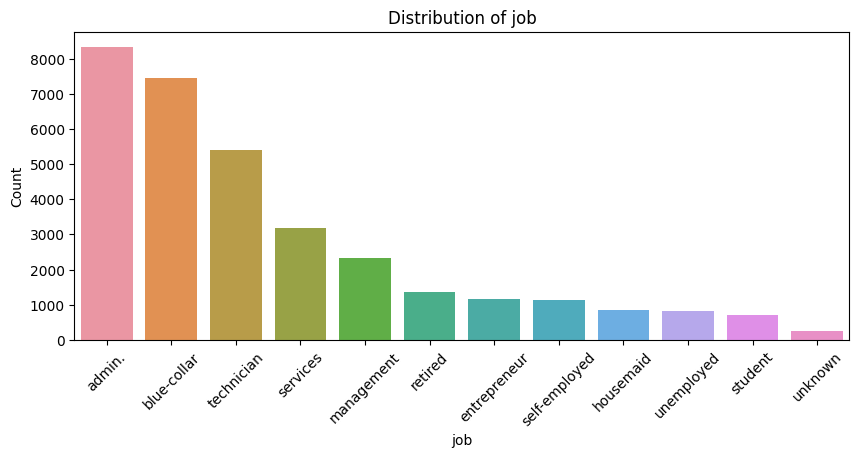

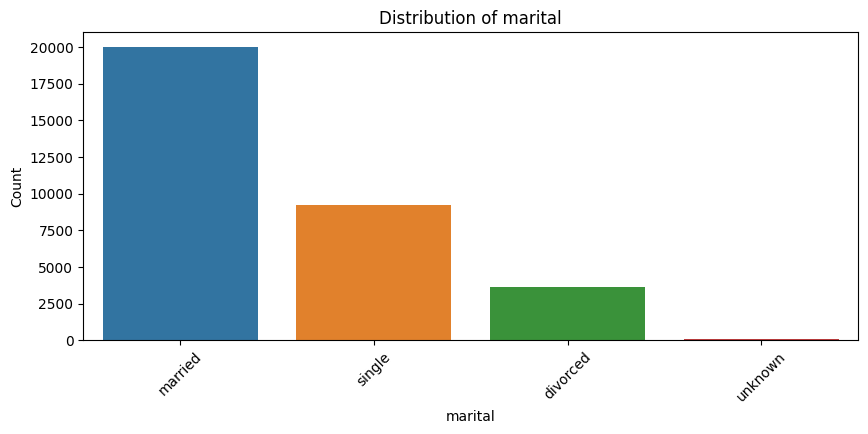

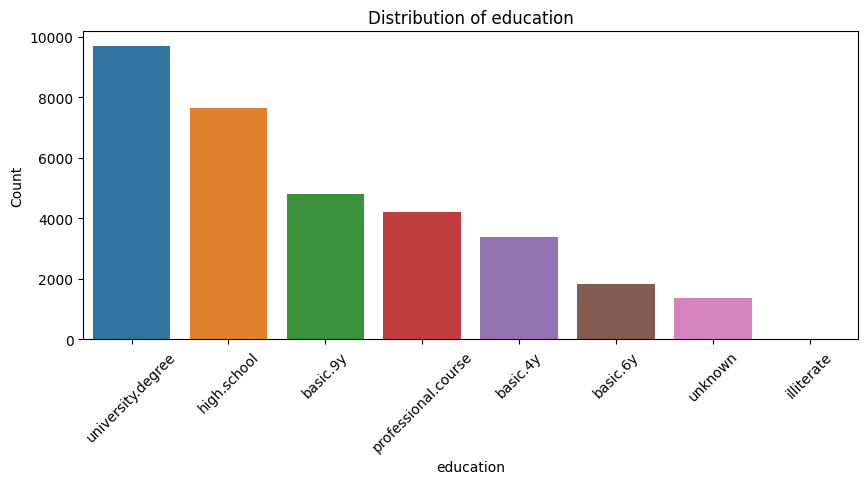

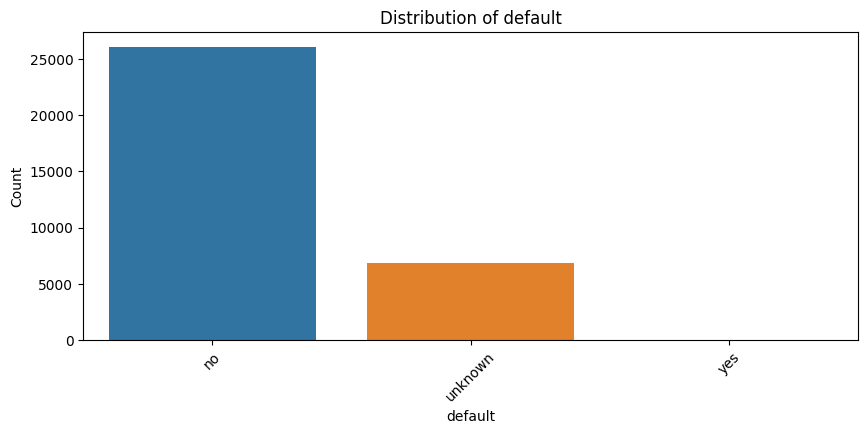

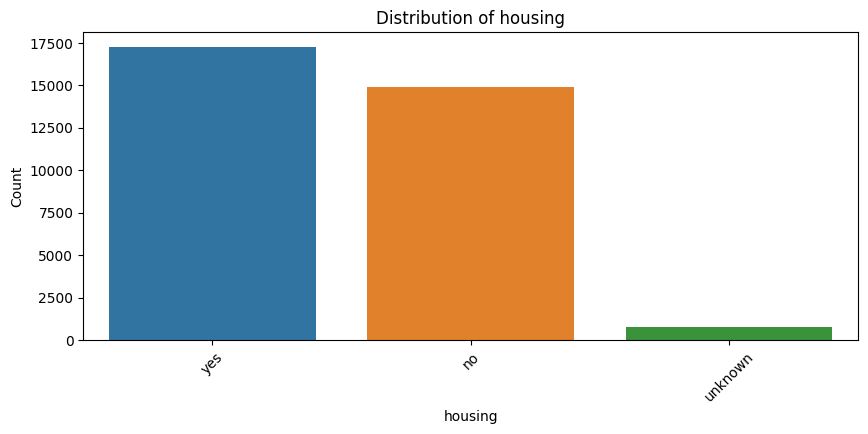

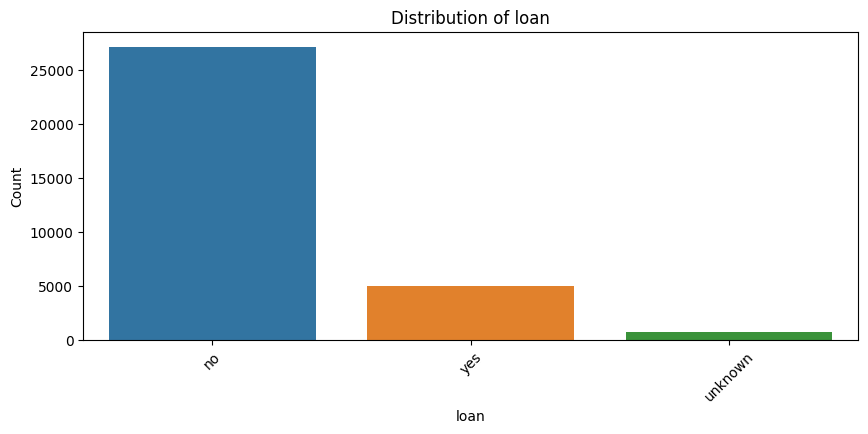

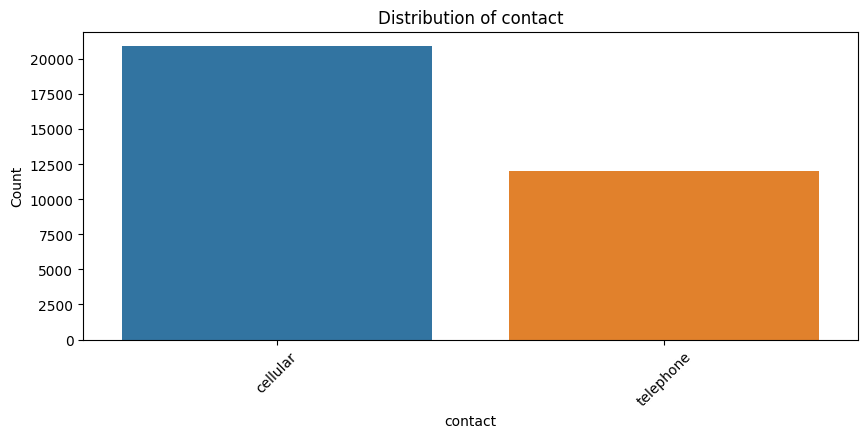

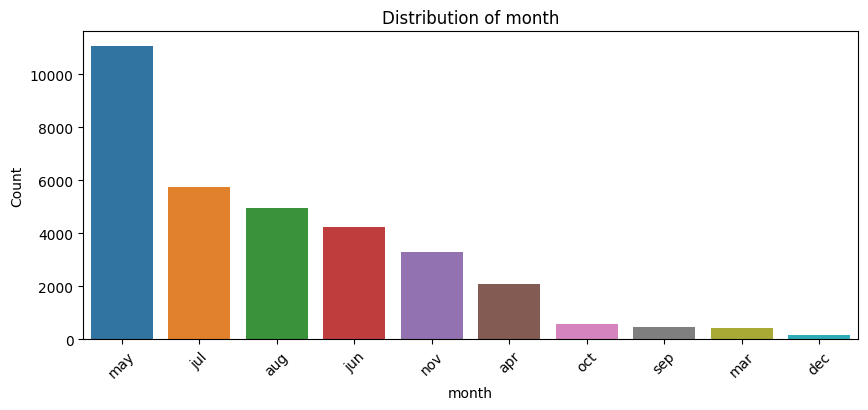

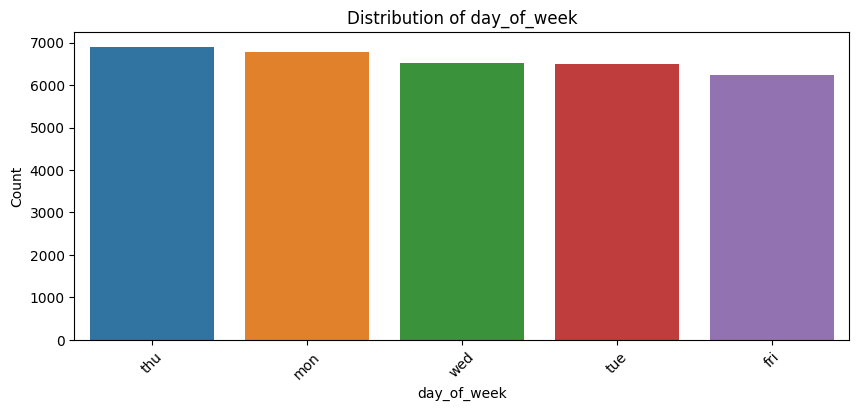

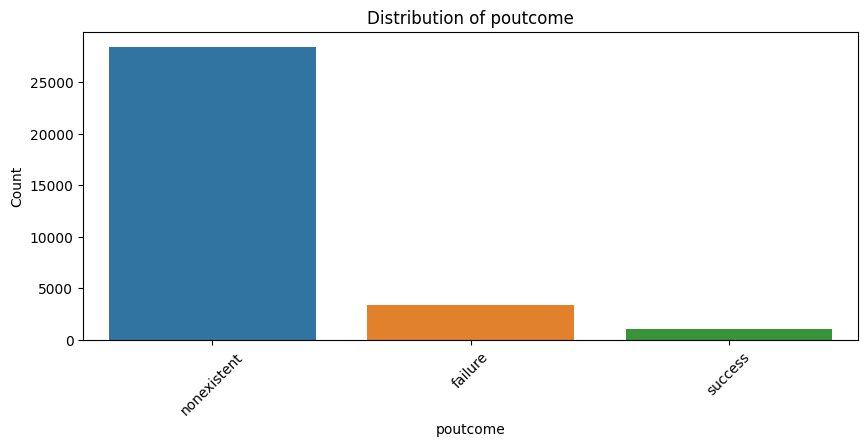

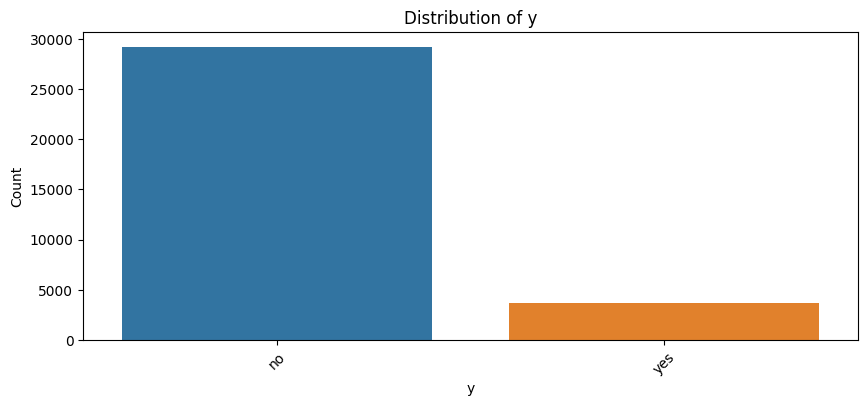

In [10]:
def plot_categorical_histograms(df):
    categorical_columns = return_categorical(df)
    
    for column in categorical_columns:
        plt.figure(figsize=(10, 4))
        
        sns.countplot(x=df[column], order=df[column].value_counts().index)
        
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        
        plt.xticks(rotation=45)
        
        plt.show()

plot_categorical_histograms(df)

Plot the correlation between numerical columns by the heatmap of correlation coefficients. **(P1-1-7: 5 points)**

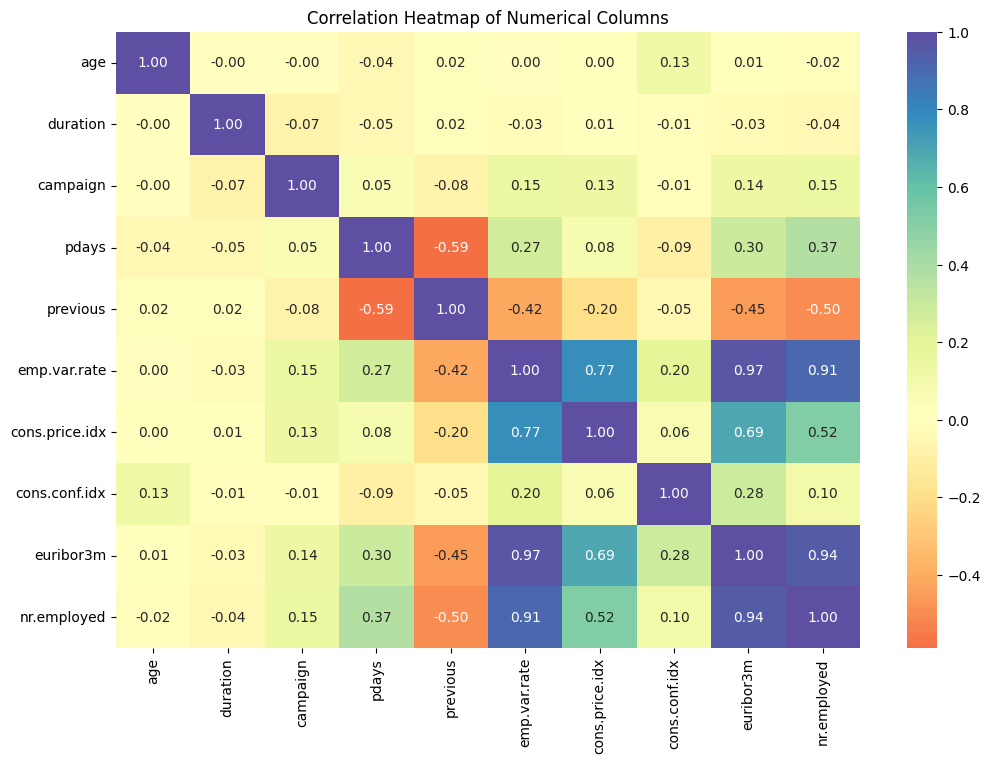

In [11]:
def plot_correlation_heatmap(df):
    numerical_columns = df.select_dtypes(include=np.number)
    
    corr_matrix = numerical_columns.corr()
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='Spectral', center=0, linewidths=0, fmt='.2f', )
    
    plt.title('Correlation Heatmap of Numerical Columns')
    
    plt.show()

plot_correlation_heatmap(df)

# Phase 2: Preprocessing

## Sec 1: Preprocess the data **(P2-Sec1: 20 Points)**

Drop the `day_of_week`, `contact`, and `month` columns. **(P2-1-1: 2 points)**

In [12]:
df = df.drop(columns = ['day_of_week', 'contact', 'month'])
df.head()

,age,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,43,blue-collar,married,basic.4y,no,yes,no,128,3,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,no
1,23,student,single,high.school,no,no,no,310,1,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,yes
2,39,services,divorced,high.school,no,no,no,160,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
3,32,admin.,married,university.degree,no,yes,yes,131,1,999,0,nonexistent,-2.9,92.201,-31.4,0.881,5076.2,no
4,33,management,single,university.degree,no,no,no,136,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


Check for duplicated rows. If there is any duplicated row, remove them. **(P2-1-2: 3 points)**

In [13]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

df = df.drop_duplicates()


Number of duplicate rows: 10


Apply onehot encoding on categorical columns **(P2-1-3: 4 points)**

In [14]:
df = pd.get_dummies(df, columns=return_categorical(df))


Balance dataset based on labels column anf then undersample balanced dataset **(P2-1-4: 4 points)**

In [15]:
from sklearn.utils import resample

def balance_and_undersample(df, labels_column):
    majority_class = df[labels_column].value_counts().idxmax()
    minority_class = df[labels_column].value_counts().idxmin()

    majority_df = df[df[labels_column] == majority_class]
    minority_df = df[df[labels_column] == minority_class]

    majority_downsampled = resample(majority_df, 
                                   replace=False,    
                                   n_samples=len(minority_df),  
                                   random_state=31)  

    balanced_df = pd.concat([majority_downsampled, minority_df])

    return balanced_df

balanced_df = balance_and_undersample(df, 'y_yes')

In [16]:
print(df.shape)
print(balanced_df.shape)
print(df.y_yes.value_counts())
balanced_df.y_yes.value_counts()

(32940, 48)
(7440, 48)
y_yes
False    29220
True      3720
Name: count, dtype: int64


y_yes
False    3720
True     3720
Name: count, dtype: int64

Split data to train validation and test sections **(P2-1-5: 3 points)**

In [17]:
x = df.drop(columns=['y_yes','y_no']).to_numpy().astype(int)
y = df['y_yes'].to_numpy().astype(int)

X_train_val, X_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=31)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=31)


In [18]:
X_train_val

array([[ 29, 603,   2, ...,   0,   1,   0],
       [ 27, 151,   4, ...,   0,   1,   0],
       [ 24,  20,   5, ...,   0,   1,   0],
       ...,
       [ 49,  47,   3, ...,   1,   0,   0],
       [ 28,  75,   2, ...,   0,   1,   0],
       [ 70, 150,   1, ...,   0,   0,   1]])

Standardize features by removing the mean and scaling to unit variance. **(P2-1-6: 4 points)**

In [19]:
scaler = StandardScaler()
scaler.fit(X_train)


X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)


# Phase 3: Modeling

## Random forest from scratch (P3-Sec0: 20 Points)
Don't know Random Forest? Read [this link](https://quera.org/blog/random-forest-algorithm/) (15 minutes).

In [20]:
import numpy as np

class DecisionTree:
    def __init__(self, max_depth=None, max_features=None):
        self.max_depth = max_depth
        self.max_features = max_features
        self.tree = {}

    def _compute_entropy(self, y):
        m = len(y)
        entropy = 0
        if m == 0:
            return 0
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / m
        entropy = -np.sum(probabilities * np.log2(probabilities))
        return entropy

    def _split_data(self, X, y, feature_index, threshold):
        left_mask = X[:, feature_index] <= threshold
        right_mask = X[:, feature_index] > threshold
        return X[left_mask], y[left_mask], X[right_mask], y[right_mask]

    def _find_best_split(self, X, y):
        best_feature_index = None
        best_threshold = None
        best_entropy = float('inf')
        n_features = X.shape[1]
        if self.max_features:
            features = np.random.choice(n_features, self.max_features, replace=False)
        else:
            features = range(n_features)
        
        for feature_index in features:
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                X_left, y_left, X_right, y_right = self._split_data(X, y, feature_index, threshold)
                if len(y_left) == 0 or len(y_right) == 0:
                    continue
                left_entropy = self._compute_entropy(y_left)
                right_entropy = self._compute_entropy(y_right)
                weighted_entropy = (len(y_left) / len(y) * left_entropy +
                                    len(y_right) / len(y) * right_entropy)
                if weighted_entropy < best_entropy:
                    best_entropy = weighted_entropy
                    best_feature_index = feature_index
                    best_threshold = threshold
        return best_feature_index, best_threshold

    def _build_tree(self, X, y, depth):
        if len(np.unique(y)) == 1:
            return y[0]
        if self.max_depth is not None and depth >= self.max_depth:
            return np.bincount(y).argmax()
        feature_index, threshold = self._find_best_split(X, y)
        if feature_index is None:
            return np.bincount(y).argmax()
        
        tree = {}
        tree['feature_index'] = feature_index
        tree['threshold'] = threshold
        X_left, y_left, X_right, y_right = self._split_data(X, y, feature_index, threshold)
        tree['left'] = self._build_tree(X_left, y_left, depth + 1)
        tree['right'] = self._build_tree(X_right, y_right, depth + 1)
        return tree

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, 0)

    def _predict_sample(self, x, tree):
        if not isinstance(tree, dict):
            return tree
        feature_index = tree['feature_index']
        threshold = tree['threshold']
        if x[feature_index] <= threshold:
            return self._predict_sample(x, tree['left'])
        else:
            return self._predict_sample(x, tree['right'])

    def predict(self, X):
        return np.array([self._predict_sample(x, self.tree) for x in X])




In [21]:
class RandomForest:
    def __init__(self, num_trees=10, max_depth=None, random_state=None, max_features=None):
        self.num_trees = num_trees
        self.max_depth = max_depth
        self.random_state = random_state
        self.max_features = max_features
        self.trees = []
        if random_state is not None:
            np.random.seed(random_state)

    def _bootstrap_sample(self, X, y):
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, n_samples, replace=True)
        return X[indices], y[indices]

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.num_trees):
            tree = DecisionTree(max_depth=self.max_depth, max_features=self.max_features)
            X_sample, y_sample = self._bootstrap_sample(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)
            
            
    def predict(self, X):
        tree_predictions = np.array([tree.predict(X) for tree in self.trees])
        tree_predictions = np.swapaxes(tree_predictions, 0, 1)
        final_predictions = []
        for sample_predictions in tree_predictions:
            unique_labels, counts = np.unique(sample_predictions, return_counts=True)
            final_predictions.append(unique_labels[np.argmax(counts)])
        return np.array(final_predictions)



In [22]:
# define and fit a random forest model
model = RandomForest( max_depth=5) ## FILL HERE
model.fit(X_train,y_train)

In [23]:
# compute your predictions on train and validation sets
y_train_pred = model.predict(X_train) ## FILL HERE
y_val_pred = model.predict(X_valid) ## FILL HERE

In [24]:
tarin_accuracy = accuracy_score(y_train, y_train_pred)
tarin_recall = recall_score(y_train, y_train_pred, average='macro')
tarin_f1 = f1_score(y_train, y_train_pred, average='macro')

val_accuracy = accuracy_score(y_valid, y_val_pred)
val_recall = recall_score(y_valid, y_val_pred, average='macro')
val_f1 = f1_score(y_valid, y_val_pred, average='macro')


print(f"Accuracy for train and validaiton: {tarin_accuracy:.2f} , {val_accuracy:.2f}")
print(f"Recall for train and validaiton: {tarin_recall:.2f} , {val_recall:.2f}")
print(f"F1 Score for train and validaiton: {tarin_f1:.2f} , {val_f1:.2f}")

Accuracy for train and validaiton: 0.91 , 0.91
Recall for train and validaiton: 0.77 , 0.76
F1 Score for train and validaiton: 0.78 , 0.77


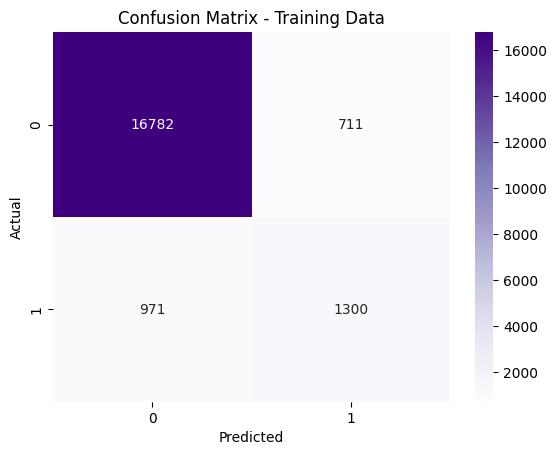

In [25]:
cm = confusion_matrix(y_train, y_train_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Data')
plt.show()


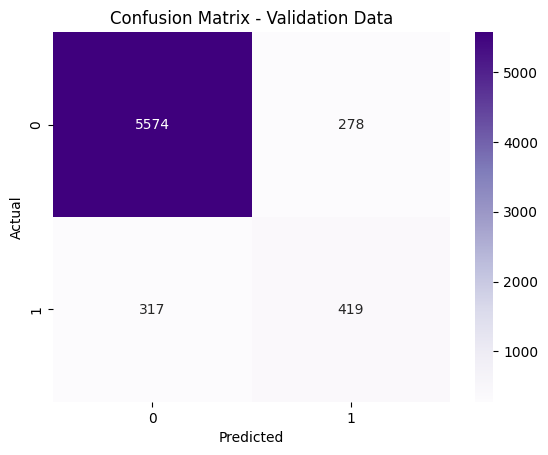

In [26]:
cm = confusion_matrix(y_valid, y_val_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Purples' )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Validation Data')
plt.show()


## Decision Tree (P3-Sec1: 10 Points)

Fit the data a decision tree with maximum depth of 2: **(P3-1-1: 2 points)**

In [27]:
# define and fit a decision tree model

tree_depth2_model = DecisionTreeClassifier(max_depth=2)
tree_depth2_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

Plot the fitted decision tree: **(P3-1-2: 2 points)**

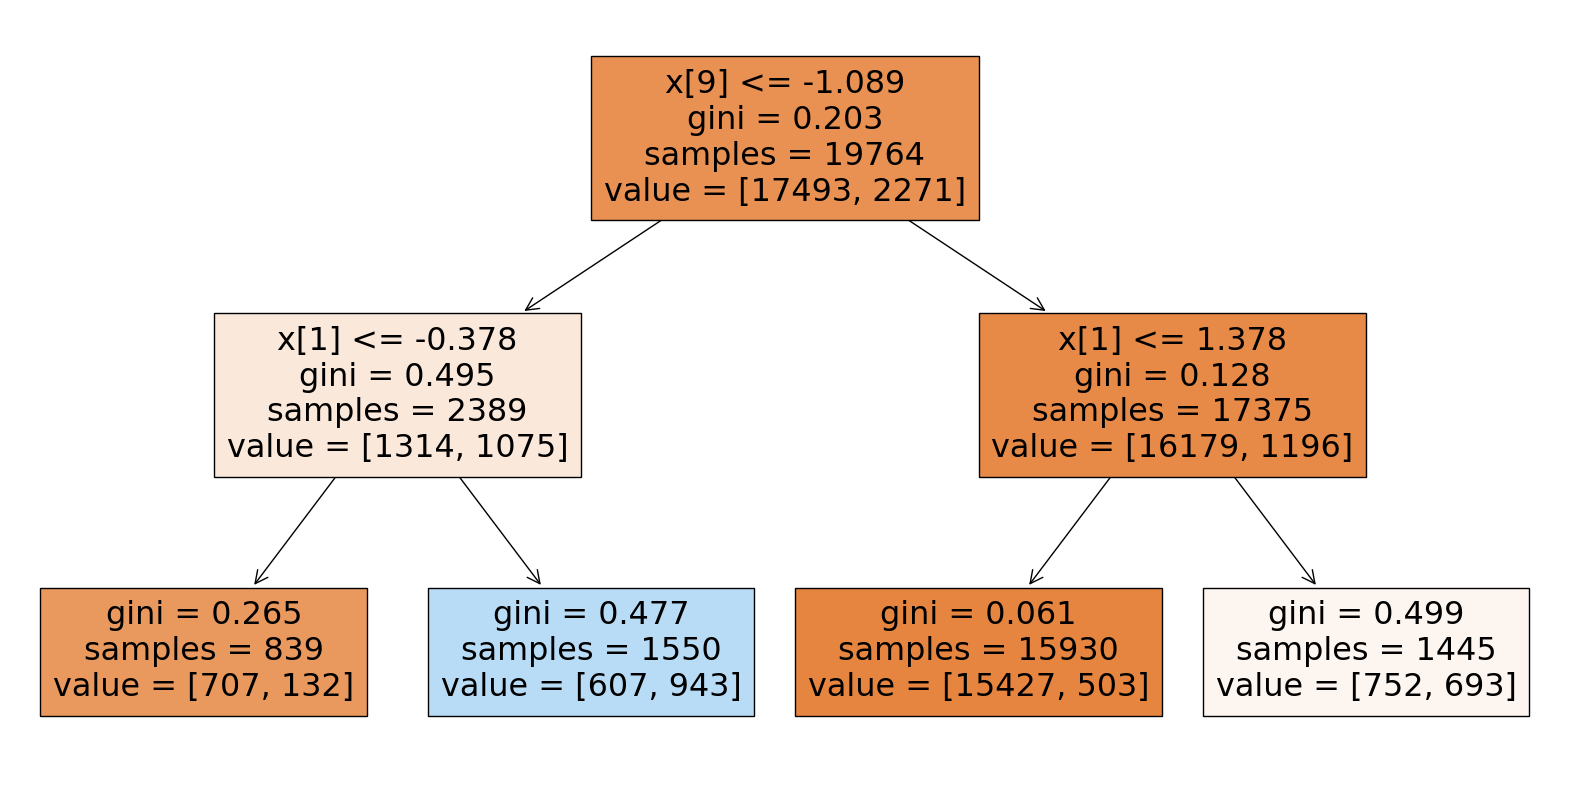

In [28]:
# plot your decision tree model
plt.figure(figsize=(20, 10))
plot_tree(tree_depth2_model, filled=True)
plt.show()

Make predictions on training and validation set and calculate accuracy, recall and f1_score on them. **(P3-1-3: 2 points)**

In [29]:
# compute your models predictions on train and validation datasets
y_train_pred = tree_depth2_model.predict(X_train) # FILL HERE
y_val_pred = tree_depth2_model.predict(X_valid) # FILL HERE


In [30]:
# print the accuracy recall and f1 score on train and validation datasets
print(' '*10 ,'Acuracys for sklean model   ' )
tarin_accuracy = accuracy_score(y_train, y_train_pred)
tarin_recall = recall_score(y_train, y_train_pred, average='macro')
tarin_f1 = f1_score(y_train, y_train_pred, average='macro')

val_accuracy = accuracy_score(y_valid, y_val_pred)
val_recall = recall_score(y_valid, y_val_pred, average='macro')
val_f1 = f1_score(y_valid, y_val_pred, average='macro')


print(f"Accuracy for train and validaiton: {tarin_accuracy:.2f} , {val_accuracy:.2f}")
print(f"Recall for train and validaiton: {tarin_recall:.2f} , {val_recall:.2f}")
print(f"F1 Score for train and validaiton: {tarin_f1:.2f} , {val_f1:.2f}")

           Acuracys for sklean model   
Accuracy for train and validaiton: 0.90 , 0.90
Recall for train and validaiton: 0.69 , 0.69
F1 Score for train and validaiton: 0.72 , 0.71


Plot the confusion matrices for the training and validation datasets. **(P3-1-4: 2 points)**

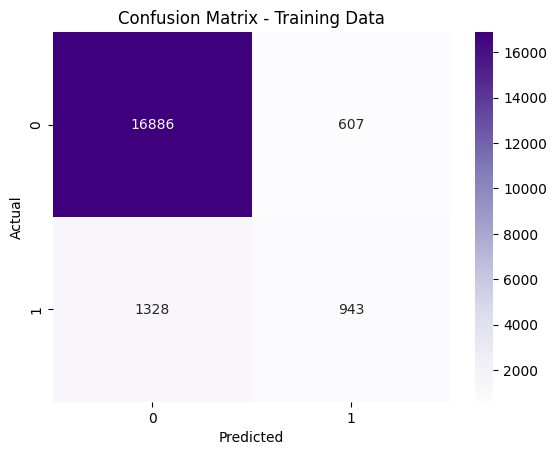

In [31]:
# print the heatmap of confusion matrix for training dataset
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Data')
plt.show()


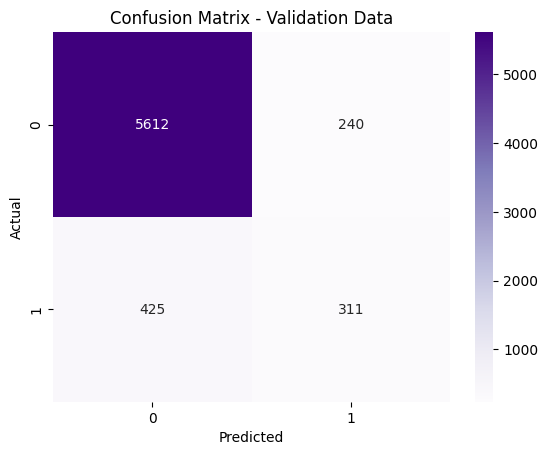

In [32]:
# print the heatmap of confusion matrix for validation dataset
cm = confusion_matrix(y_valid, y_val_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples' )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Validation Data')
plt.show()


Experiment with different depth trees and plot the f1_score associated with each depth on training and valication datasets. **(P3-1-5: 2 points)**

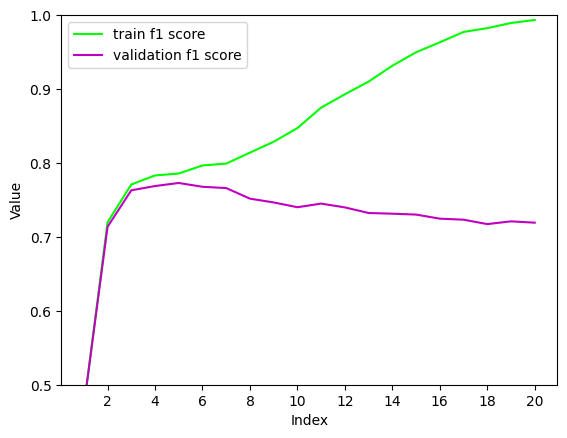

In [33]:
result_train = np.zeros(20)
result_valid = np.zeros(20)

for i in range(20):
    depth = i+1
    tree = DecisionTreeClassifier(max_depth=depth)
    tree.fit(X_train , y_train)
    y_train_pred = tree.predict(X_train)
    y_valid_pred = tree.predict(X_valid)
    result_train[i] = f1_score(y_train, y_train_pred, average='macro')
    result_valid[i] = f1_score(y_valid, y_valid_pred, average='macro')

indices = np.arange(len(result_train)) + 1
plt.plot(indices, result_train, label='train f1 score', color = 'lime')
plt.plot(indices, result_valid, label='validation f1 score',color = 'm')
plt.xticks(np.arange(2, len(result_valid) + 1, 2))  
plt.ylim(0.5, 1)
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

# Show plot
plt.show()

## Random Forest (P3-Sec2: 10 Points)

Fit a random forest on the training data **(P3-2-1: 3 points)**

In [34]:
# define and fit your random forest model
model = RandomForestClassifier()# FILL HERE
model.fit(X_train , y_train)

RandomForestClassifier()

Plot the feature importances using a bar plot and plot the histogram for depthes of trees**(P3-2-2: 3 points)**

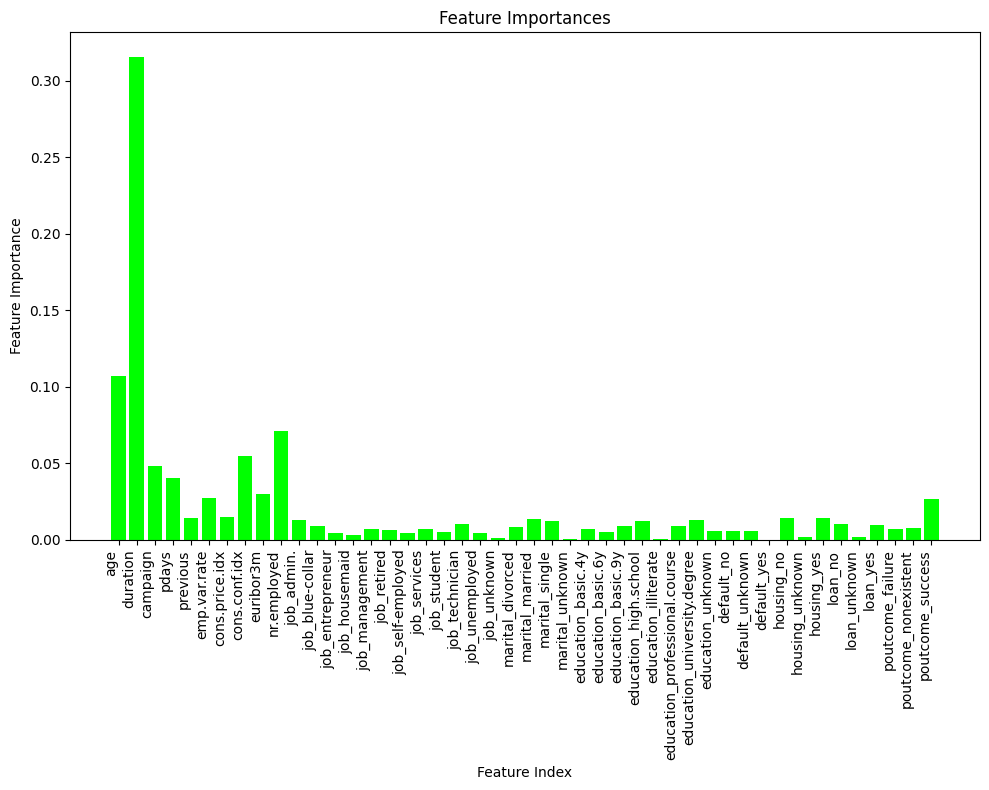

In [35]:
# plot histogram of feature importances
feature_names = balanced_df.columns[:-2]
plt.figure(figsize=(10, 8))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_,color = 'lime' )

plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Feature Importances')
plt.xticks(range(len(model.feature_importances_)), feature_names, rotation=90, ha='right')
plt.tight_layout()
plt.show()



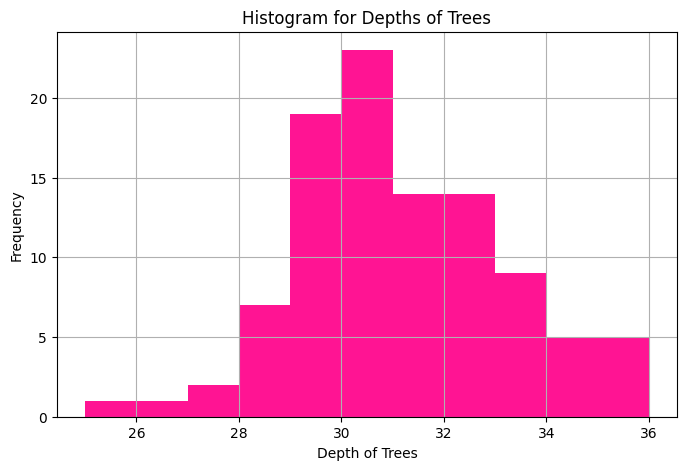

In [36]:
# plot distribution of tree depthes
tree_depths = [estimator.tree_.max_depth for estimator in model.estimators_]
plt.figure(figsize=(8, 5))
plt.hist(tree_depths, bins=range(min(tree_depths), max(tree_depths) + 1), color = 'deeppink')
plt.xlabel('Depth of Trees')
plt.ylabel('Frequency')
plt.title('Histogram for Depths of Trees')
plt.grid(True)
plt.show()

Make predictions using the model and print the accuracy, recall, f1_score and plot roc auc curves for training and validation data. **(P3-2-3: 4 points)**

In [37]:
# compute predictions on train and validation datasets
y_train_pred = model.predict(X_train) # FILL HERE
y_val_pred = model.predict(X_valid) # FILL HERE



In [38]:
# print the accuracy, recall and f1 score on training and validation datasets
tarin_accuracy = accuracy_score(y_train, y_train_pred)
tarin_recall = recall_score(y_train, y_train_pred, average='macro')
tarin_f1 = f1_score(y_train, y_train_pred, average='macro')

val_accuracy = accuracy_score(y_valid, y_val_pred)
val_recall = recall_score(y_valid, y_val_pred, average='macro')
val_f1 = f1_score(y_valid, y_val_pred, average='macro')


print(f"Accuracy for train and validaiton: {tarin_accuracy:.2f} , {val_accuracy:.2f}")
print(f"Recall for train and validaiton: {tarin_recall:.2f} , {val_recall:.2f}")
print(f"F1 Score for train and validaiton: {tarin_f1:.2f} , {val_f1:.2f}")

Accuracy for train and validaiton: 1.00 , 0.91
Recall for train and validaiton: 1.00 , 0.71
F1 Score for train and validaiton: 1.00 , 0.74


In [39]:
# compute probability predictions
train_probability_predictions = model.predict_proba(X_train)
validation_probability_predictions = model.predict_proba(X_valid)


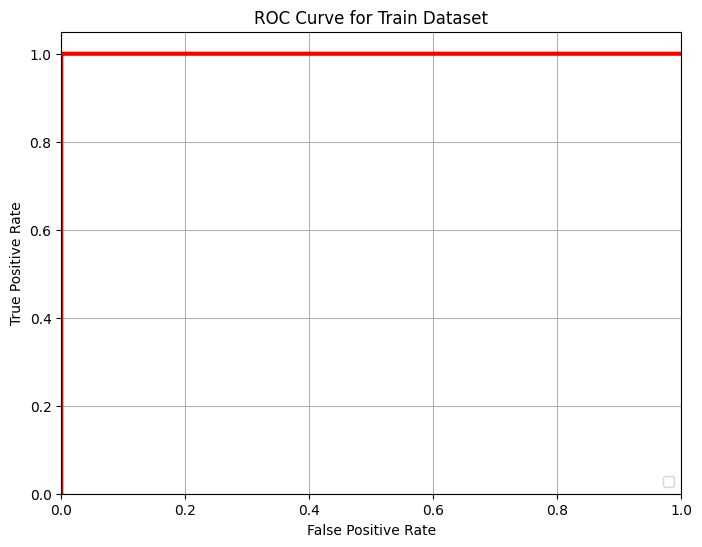

In [40]:
# plot the roc-auc curve for train dataset
fpr, tpr, thresholds = roc_curve(y_train, train_probability_predictions[:, 1])

# Plot the ROC-AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='r', lw=3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Train Dataset')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [41]:
from sklearn.metrics import roc_auc_score

roc_auc_train = roc_auc_score(y_train, train_probability_predictions[:, 1])

print("ROC-AUC score on training dataset:", roc_auc_train)

ROC-AUC score on training dataset: 0.9999999874139756


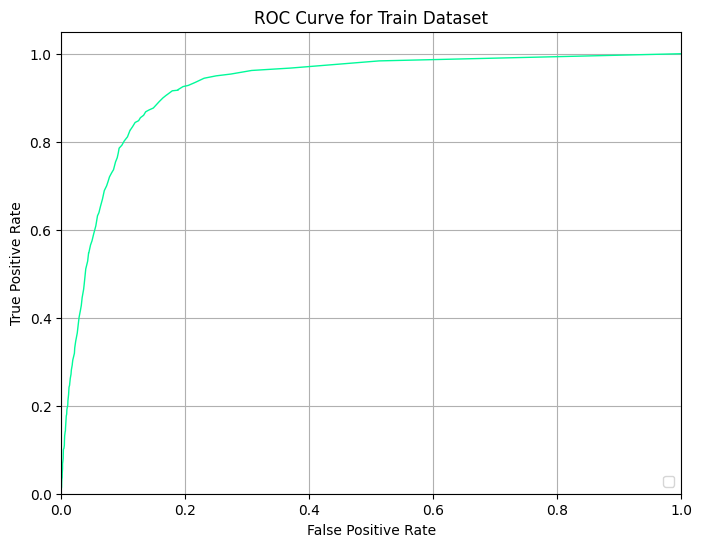

In [42]:
# plot roc-auc curve for validation predictions
fpr, tpr, thresholds = roc_curve(y_valid, validation_probability_predictions[:, 1])

# Plot the ROC-AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='mediumspringgreen', lw=1, )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Train Dataset')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [43]:
# print the roc-auc score for validation dataset

roc_auc_valid = roc_auc_score(y_valid, validation_probability_predictions[:, 1])

print("ROC-AUC score on validation dataset:", roc_auc_valid)

ROC-AUC score on validation dataset: 0.9249805900621118


## Gradient Boosted Decision Trees (P3-Sec3: 10 Points)

Fit a gradient boosted decision tree(e.g. xgboost, lightgbm, catboost) on the data and print accuracy, recall, f1_socre for training and validation datasets also plot the roc auc curves on training and validation datasets.

In [44]:
# define and fit a gradient boosted decision tree
model = XGBClassifier() # FILL HERE
model.fit(X_train, y_train)

# compute predictions on train and validation datasets
y_train_pred = model.predict(X_train) # FILL HERE
y_val_pred = model.predict(X_valid)# FILL HERE

# print accuracy, recall and f1-score on train and validation datasets
tarin_accuracy = accuracy_score(y_train, y_train_pred)
tarin_recall = recall_score(y_train, y_train_pred, average='macro')
tarin_f1 = f1_score(y_train, y_train_pred, average='macro')

val_accuracy = accuracy_score(y_valid, y_val_pred)
val_recall = recall_score(y_valid, y_val_pred, average='macro')
val_f1 = f1_score(y_valid, y_val_pred, average='macro')


print(f"Accuracy for train and validaiton: {tarin_accuracy:.2f} , {val_accuracy:.2f}")
print(f"Recall for train and validaiton: {tarin_recall:.2f} , {val_recall:.2f}")
print(f"F1 Score for train and validaiton: {tarin_f1:.2f} , {val_f1:.2f}")

Accuracy for train and validaiton: 0.97 , 0.91
Recall for train and validaiton: 0.89 , 0.75
F1 Score for train and validaiton: 0.91 , 0.76


In [45]:
#compute probability predictions on train and validation datasets
train_probability_predictions = model.predict_proba(X_train)
validation_probability_predictions = model.predict_proba(X_valid)

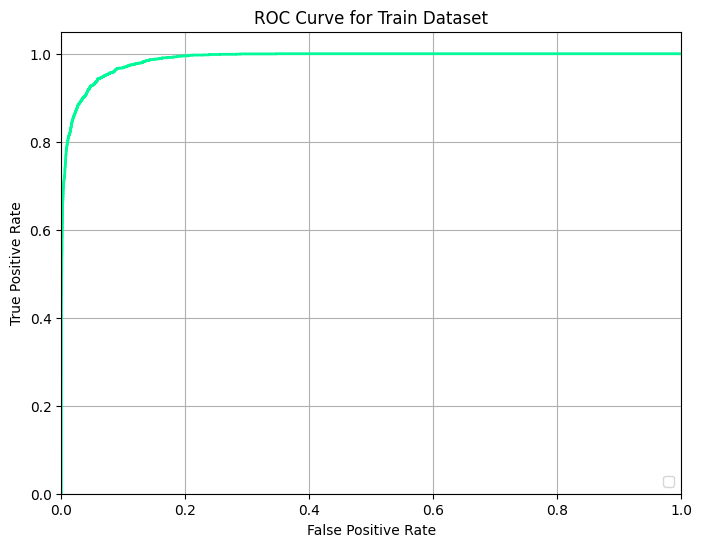

In [46]:
# plot the roc-auc curve for training dataset
fpr, tpr, thresholds = roc_curve(y_train, train_probability_predictions[:, 1])

# Plot the ROC-AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='mediumspringgreen', lw=2, )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Train Dataset')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [47]:
# print the roc-auc score on training data
roc_auc_tarin = roc_auc_score(y_train , train_probability_predictions[:, 1])

print("ROC-AUC score on tarin dataset:", roc_auc_tarin)

ROC-AUC score on tarin dataset: 0.9880730174689237


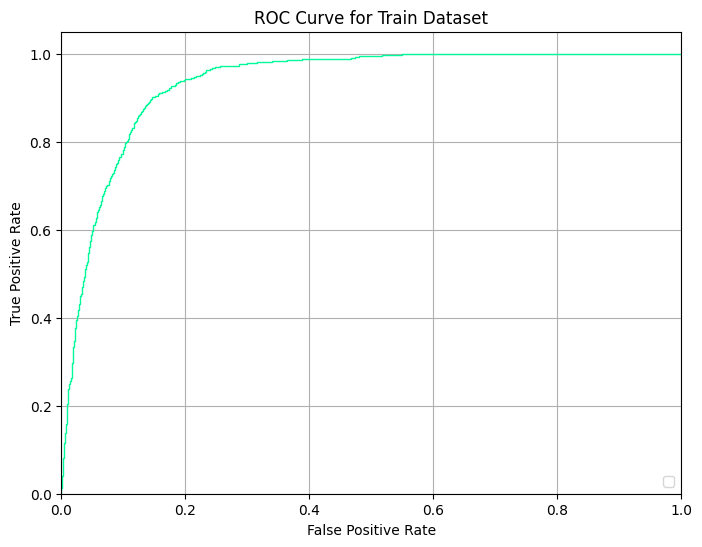

In [48]:
# plot the roc-auc curve for validation dataset
fpr, tpr, thresholds = roc_curve(y_valid, validation_probability_predictions[:, 1])

# Plot the ROC-AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='mediumspringgreen', lw=1, )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Train Dataset')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [49]:
# print the roc-auc score on validation data
roc_auc_valid = roc_auc_score(y_valid, validation_probability_predictions[:, 1])

print("ROC-AUC score on validation dataset:", roc_auc_valid)

ROC-AUC score on validation dataset: 0.9349725289013047


## Tuning parameters using optuna? (P3-Sec4: 15 Points)

There are many tunable parameters in Gradient boosted decision trees tuning all of them using grid search is almost impossible. There is no other choice for tuing hyperparameters unless you assume some models on behaviour of models under different hyperparameter choices e.g. the follow a gaussian process. Use the optuna library to tune the hyperparameters of gradient boosted decision tree. Report the results as in the previous parts.

Do you want to get familiar more with it? Follow [this link](https://datagy.io/python-optuna/) (+40 minutes)

Do you know the difference between parameters and hyperparameters? If no, you can find more [here](https://virgool.io/@maryam.hasanali/%D9%87%D8%A7%DB%8C%D9%BE%D8%B1%D9%BE%D8%A7%D8%B1%D8%A7%D9%85%D8%AA%D8%B1%D9%87%D8%A7%DB%8C-%D8%AF%D8%B1-%DB%8C%DA%A9-%D9%85%D8%AF%D9%84-%DB%8C%D8%A7%D8%AF%DA%AF%DB%8C%D8%B1%DB%8C-%D9%85%D8%A7%D8%B4%DB%8C%D9%86-%DA%86%DB%8C%D8%B3%D8%AA-%D9%88-%DA%86%DA%AF%D9%88%D9%86%D9%87-%D8%A2%D9%86-%D8%B1%D8%A7-%D8%AA%D9%86%D8%B8%DB%8C%D9%85-%DA%A9%D9%86%DB%8C%D9%85-o8zgjoouhwen) (3 minutes).

In [50]:
# define your objective based on cross val score of your model on training data
def objective(trial):
    # Suggest hyperparameters for XGBoost
    param = {
        'verbosity': 0,
        'objective': 'binary:logistic',
        'booster': 'gbtree',
        'tree_method': 'hist',
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'lambda': trial.suggest_loguniform('lambda', 1e-8, 1.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-8, 1.0)
    }

    # Initialize the XGBoost model with suggested parameters
    model = XGBClassifier(**param)

    # Use cross-validation to evaluate the model
    score = cross_val_score(model, X_train, y_train, scoring=make_scorer(accuracy_score), cv=3)
    accuracy = score.mean()
    return accuracy

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=15)

# Get the best trial parameters
trial = study.best_trial
trial.params

[I 2024-05-24 17:50:57,308] A new study created in memory with name: no-name-c97252db-fcac-4840-8574-7135a2b9c974
[I 2024-05-24 17:51:02,039] Trial 0 finished with value: 0.9116575591985429 and parameters: {'max_depth': 5, 'learning_rate': 0.04292692983118915, 'n_estimators': 660, 'gamma': 1.1054969538016971e-07, 'min_child_weight': 6, 'subsample': 0.7232933472130865, 'colsample_bytree': 0.6536202055826059, 'lambda': 0.00011880507409772554, 'alpha': 2.1168928318740122e-08}. Best is trial 0 with value: 0.9116575591985429.
[I 2024-05-24 17:51:08,500] Trial 1 finished with value: 0.9093806921675774 and parameters: {'max_depth': 8, 'learning_rate': 0.03019284304481931, 'n_estimators': 664, 'gamma': 0.00014498147120045008, 'min_child_weight': 6, 'subsample': 0.7300848841110614, 'colsample_bytree': 0.833904886090558, 'lambda': 3.847109291321177e-06, 'alpha': 3.099011815077683e-07}. Best is trial 0 with value: 0.9116575591985429.
[I 2024-05-24 17:51:17,503] Trial 2 finished with value: 0.9115

{'max_depth': 3,
 'learning_rate': 0.05183713053216905,
 'n_estimators': 330,
 'gamma': 0.0035501638221911193,
 'min_child_weight': 8,
 'subsample': 0.5203426824235737,
 'colsample_bytree': 0.9992677000797413,
 'lambda': 2.9737957607527204e-07,
 'alpha': 3.1911320512732373e-06}

In [51]:
# fit your model using new parameters
model = XGBClassifier(**trial.params)
model.fit(X_train, y_train)

# Compute predictions for train and validation datasets
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_valid)

# Print accuracy, recall, and f1-score on training and validation datasets
print("Metrics on Training Dataset:")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Recall:", recall_score(y_train, y_train_pred))
print("F1-score:", f1_score(y_train, y_train_pred))

print("\nMetrics on Validation Dataset:")
print("Accuracy:", accuracy_score(y_valid, y_val_pred))
print("Recall:", recall_score(y_valid, y_val_pred))
print("F1-score:", f1_score(y_valid, y_val_pred))




Metrics on Training Dataset:
Accuracy: 0.9226371179923093
Recall: 0.5702333773667988
F1-score: 0.6287933964554504

Metrics on Validation Dataset:
Accuracy: 0.9098360655737705
Recall: 0.5054347826086957
F1-score: 0.5560538116591929


In [52]:
# compute probability predictions on train and validation datasets
train_probability_predictions = model.predict_proba(X_train)[:, 1]
validation_probability_predictions = model.predict_proba(X_valid)[:, 1]


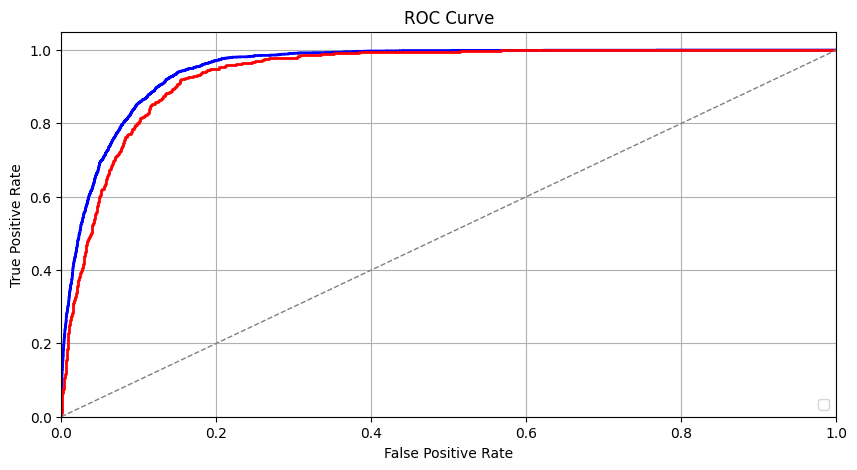

In [53]:
# plot roc-auc curve for train and validation datasets
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_probability_predictions)
fpr_val, tpr_val, thresholds_val = roc_curve(y_valid, validation_probability_predictions)

# Plot ROC-AUC curves
plt.figure(figsize=(10, 5))
plt.plot(fpr_train, tpr_train, color='blue', lw=2)
plt.plot(fpr_val, tpr_val, color='red', lw=2)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [54]:
# compute roc-auc score for training dataset
roc_auc_train = roc_auc_score(y_train, train_probability_predictions)
print("ROC-AUC score for training dataset:", roc_auc_train)

ROC-AUC score for training dataset: 0.9528757971075452


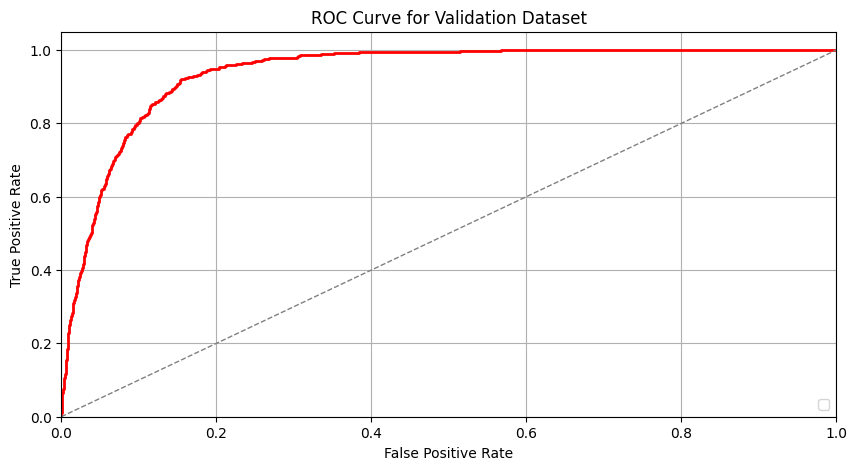

In [55]:
# plot roc-auc curve for validation dataset
fpr_val, tpr_val, thresholds_val = roc_curve(y_valid, validation_probability_predictions)

plt.figure(figsize=(10, 5))
plt.plot(fpr_val, tpr_val, color='red', lw=2)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Validation Dataset')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [56]:
# compute roc-auc score for training dataset
roc_auc_train = roc_auc_score(y_train, train_probability_predictions)
print("ROC-AUC score for training dataset:", roc_auc_train)

ROC-AUC score for training dataset: 0.9528757971075452


# Phase 4: Evaluation

## Evaluate Performance on Test Data (P4-Sec1: 5 Points)

Evaluate your model on the testing data using f1 score and roc auc curve and score.

In [57]:
# compute your predictions on test dataset
test_probability_predictions = model.predict_proba(X_test)


In [58]:
# compute f1-score on the test dataset
test_predictions = model.predict(X_test)

f1_test = f1_score(y_test, test_predictions)

print("F1-score on the test dataset:", f1_test)

F1-score on the test dataset: 0.549520766773163


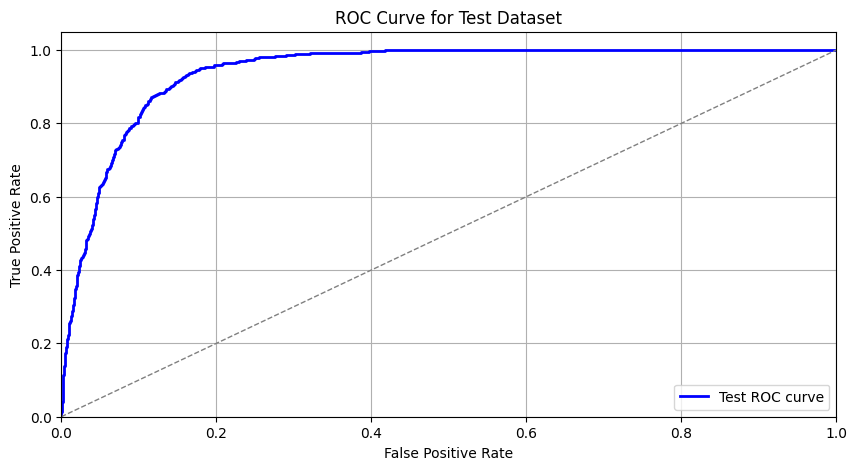

In [59]:
# plot roc-auc curve for test dataset
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_probability_predictions[:, 1])

# Plot ROC-AUC curve for test dataset
plt.figure(figsize=(10, 5))
plt.plot(fpr_test, tpr_test, color='blue', lw=2, label='Test ROC curve')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Dataset')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [60]:
# print roc-auc score for test dataset
roc_auc_test = roc_auc_score(y_test, test_probability_predictions[:, 1])

print("ROC-AUC score for test dataset:", roc_auc_test)

ROC-AUC score for test dataset: 0.9434196532481872
